# Filtered vs Non Filtered

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_n = pd.read_csv("20_nonfiltered.csv")
df_n.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect", "Time_ns"]
df_n['Rect'] = df_n['Rect'] / max(df_n['Rect'])

df_f = pd.read_csv("20_filtered.csv")
df_f.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect", "Time_ns"]
df_f['Rect'] = df_f['Rect'] / max(df_f['Rect'])
#df.to_csv("testing_data.csv", index=False)

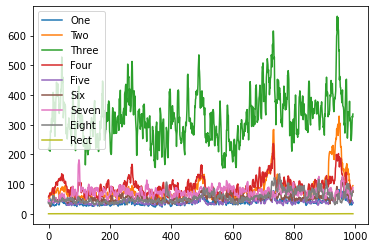

In [7]:
df_f.drop("Time_ns",1).plot()

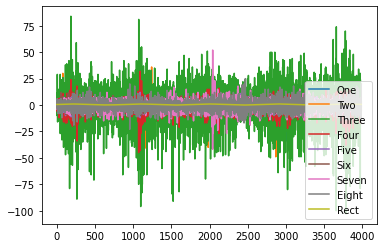

In [8]:
df_n.drop("Time_ns",1).plot()

## The data rate.
Filtered data: 993.000000  20.004196166992188 seconds.  
Non Filtered data: 3989.000000 20.008700609207153 seconds.  

Therefore the filtered data was sent at about 50Hz, and the raw data was sent at about 200Hz. 

In [9]:
df_f.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,9.930000e+02
mean,39.912387,83.342397,329.055388,93.079557,41.908359,54.070493,72.927492,55.869084,0.527471,1.004111e+10
std,10.022021,43.812094,80.947775,28.403571,8.518283,11.329961,16.587949,18.851098,0.289818,5.751547e+09
min,23.000000,41.000000,154.000000,42.000000,27.000000,24.000000,36.000000,26.000000,0.000000,9.799299e+07
25%,33.000000,59.000000,274.000000,73.000000,36.000000,47.000000,63.000000,42.000000,0.278571,5.076981e+09
50%,38.000000,71.000000,323.000000,88.000000,41.000000,52.000000,73.000000,50.000000,0.550000,1.003697e+10
75%,45.000000,86.000000,376.000000,106.000000,46.000000,60.000000,82.000000,65.000000,0.778571,1.502442e+10
max,82.000000,329.000000,665.000000,237.000000,77.000000,124.000000,182.000000,135.000000,1.000000,1.998782e+10


In [10]:
df_n.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect,Time_ns
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3.989000e+03
mean,-0.748057,-0.937578,-0.871396,-0.771121,-0.823264,-0.805465,-0.754074,-0.764853,0.527681,9.994086e+09
std,2.713862,5.679095,18.384974,5.046276,2.741377,3.305987,4.257854,4.185141,0.288952,5.774062e+09
min,-34.000000,-49.000000,-103.000000,-45.000000,-12.000000,-13.000000,-42.000000,-23.000000,0.000000,3.224328e+07
25%,-2.000000,-4.000000,-11.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,0.278571,5.010607e+09
50%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.550000,9.993528e+09
75%,1.000000,2.000000,11.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.778571,1.498718e+10
max,11.000000,36.000000,84.000000,32.000000,12.000000,12.000000,52.000000,25.000000,1.000000,1.997698e+10


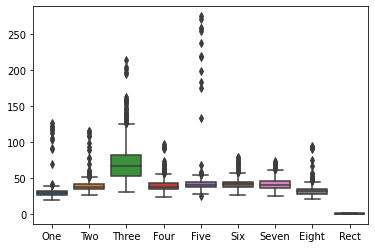

In [9]:
sns.boxplot(data=df_f)

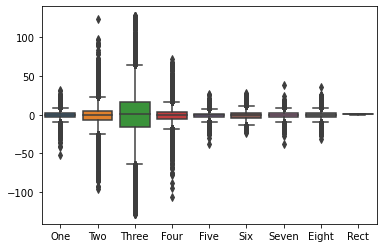

In [10]:
sns.boxplot(data=df_n)

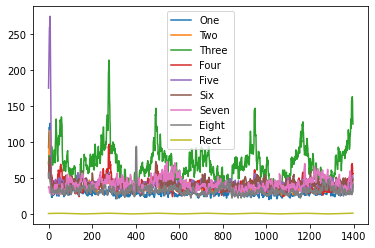

In [7]:
df_f.plot()

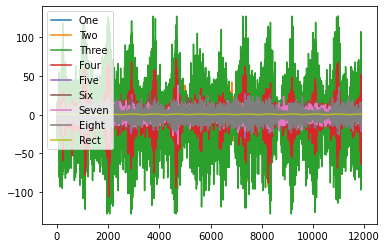

In [8]:
df_n.plot()

## Filtered data analysis

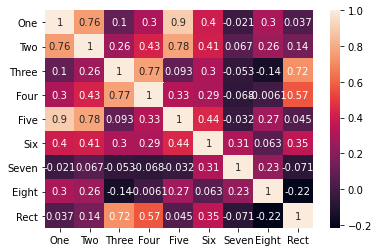

In [11]:
sns.heatmap(df_f.corr(), annot=True)

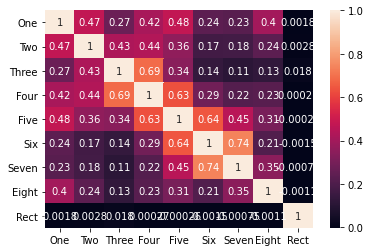

In [13]:
sns.heatmap(df_n.corr(), annot=True)

We can clearly see from the corrolations that filtering has helped generate meaningful corrolations between the position of the rectangle paddle, Rect and channel 3. We can also see corrolations between the channels. 

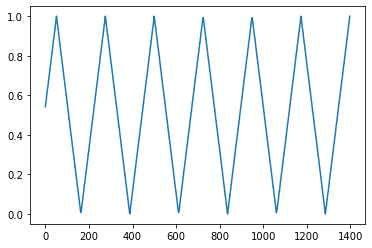

In [14]:
df_f['Rect'].plot()

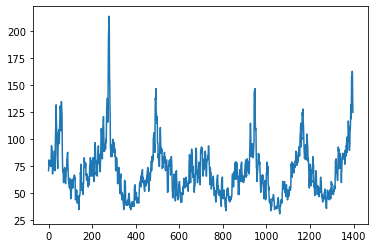

In [15]:
df_f['Three'].plot()

Looking at channel 3, we can see it rise as Rect does. 

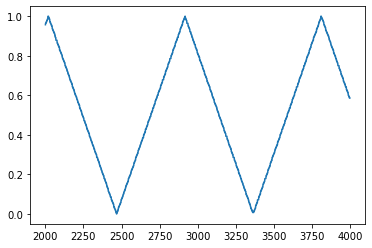

In [19]:
df_n['Rect'][2000:4000].plot()

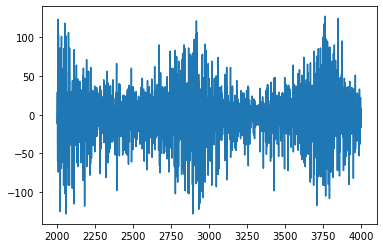

In [20]:
df_n['Three'][2000:4000].plot()

## Filtering the none filtered data. 

The filtered signal is a stream of low-pass filtered EMG signals from the eight
        sensor pods of the Myo armband.
        Instead of getting the raw EMG signals, we get rectified and smoothed
        signals, a measure of the amplitude of the EMG (which is useful to have
        a measure of muscle strength, but are not as useful as a truly raw signal).
        
### Rectification


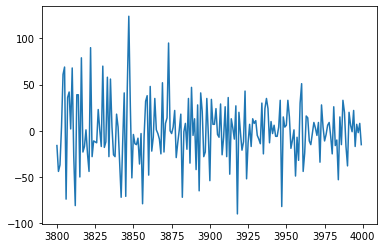

In [29]:
df_n['Three'][3800:4000].plot()

As shown above, the EMG signal is made up of both positive and negative components. 
This means the mean of our signal is close to 0. 

This can be a problem for analysis, we can see that our filtered data was a high mean. 

In [24]:
df_n.mean()

One     -0.759946
Two     -0.854656
Three   -0.420809
Four    -0.784338
Five    -0.887543
Six     -0.837497
Seven   -0.785937
Eight   -0.784843
Rect     0.504820
dtype: float64

In [25]:
df_f.mean()

One      29.904864
Two      38.164521
Three    70.153076
Four     39.292561
Five     42.287554
Six      41.766810
Seven    41.842632
Eight    32.167382
Rect      0.510040
dtype: float64

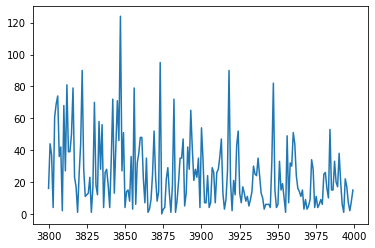

In [30]:
abs(df_n['Three'][3800:4000]).plot()

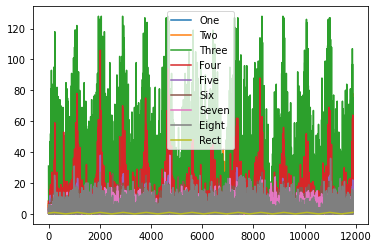

In [33]:
# Rectifying our non filtered data. 
df = abs(df_n)
df['Rect'] = df_n['Rect']
df.plot()

Text(0.5, 1.0, 'Corrolations of raw sEMG data.')

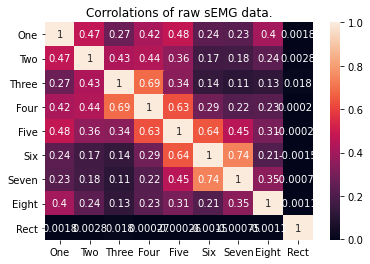

In [40]:
sns.heatmap(df_n.corr(), annot=True).set_title('Corrolations of raw sEMG data.')

Text(0.5, 1.0, 'Corrolations of rectified raw sEMG data.')

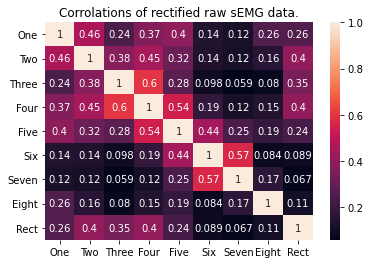

In [41]:
sns.heatmap(df.corr(), annot=True).set_title('Corrolations of rectified raw sEMG data.')

Text(0.5, 1.0, 'Corrolations of filtered sEMG data.')

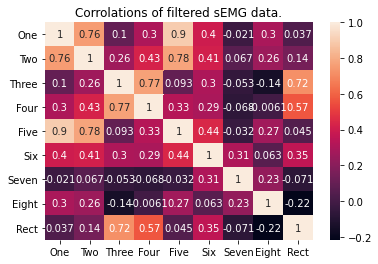

In [42]:
sns.heatmap(df_f.corr(), annot=True).set_title('Corrolations of filtered sEMG data.')

No handles with labels found to put in legend.


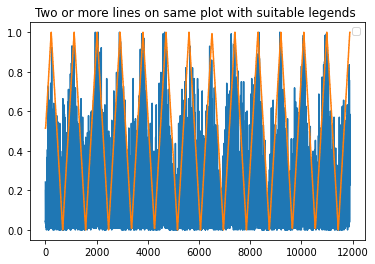

In [52]:
def plot_rect(df, channel="Three"):
    channel_data = df[channel] / max(df[channel])
    plt.plot(channel_data)
    plt.plot(df['Rect'])
    plt.title('Two or more lines on same plot with suitable legends ')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()
plot_rect(df)

No handles with labels found to put in legend.


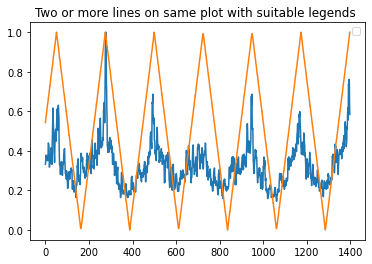

In [53]:
plot_rect(df_f)

We can see our signal is getting closer to being useful, but we can see our readings hit 0 frequently.

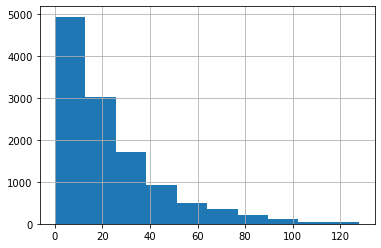

In [56]:
df['Three'].hist()

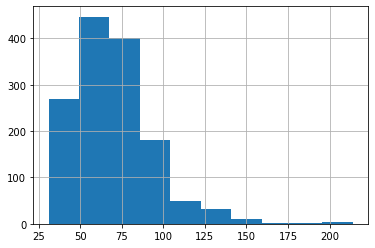

In [58]:
df_f['Three'].hist()

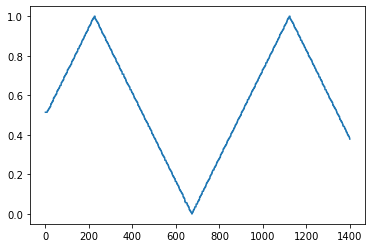

In [66]:
plt.plot(df['Rect'][0:1400])

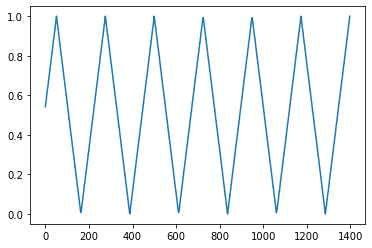

In [65]:
plt.plot(df_f['Rect'])

We can also see that for the same index range we have much less raw data than filtered data, but why is this?
To get around this, lets start logging time. 

In [68]:
df.head(10)

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
0,4.0,5.0,31.0,8.0,4.0,3.0,1.0,3.0,0.514286
1,4.0,4.0,9.0,4.0,1.0,0.0,0.0,3.0,0.514286
2,0.0,9.0,5.0,2.0,1.0,1.0,0.0,0.0,0.514286
3,0.0,2.0,15.0,1.0,0.0,0.0,1.0,2.0,0.514286
4,3.0,6.0,9.0,2.0,0.0,0.0,2.0,0.0,0.514286
5,3.0,7.0,5.0,2.0,4.0,4.0,2.0,3.0,0.514286
6,0.0,1.0,6.0,7.0,3.0,4.0,2.0,1.0,0.514286
7,2.0,6.0,16.0,4.0,1.0,0.0,0.0,2.0,0.514286
8,1.0,6.0,4.0,1.0,3.0,4.0,0.0,1.0,0.514286
9,2.0,0.0,9.0,0.0,2.0,2.0,0.0,2.0,0.521429


In the above 9 rows from our non filtered data, we have multiple readings all for the same rect. 
Compared to below, where in the filtered data we see only one reading per rect value. 

In [69]:
df_f.head(10)

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
0,92.0,69.0,71.0,56.0,175.0,53.0,37.0,50.0,0.542857
1,103.0,78.0,73.0,60.0,199.0,58.0,38.0,55.0,0.557143
2,112.0,89.0,76.0,67.0,220.0,63.0,38.0,57.0,0.564286
3,117.0,99.0,81.0,69.0,238.0,69.0,35.0,53.0,0.571429
4,121.0,108.0,77.0,67.0,259.0,79.0,31.0,51.0,0.578571
5,117.0,112.0,76.0,65.0,259.0,78.0,29.0,48.0,0.592857
6,123.0,116.0,80.0,69.0,271.0,78.0,31.0,47.0,0.600000
7,126.0,116.0,80.0,67.0,275.0,78.0,31.0,45.0,0.607143
8,118.0,109.0,76.0,63.0,255.0,73.0,30.0,44.0,0.621429
9,106.0,93.0,75.0,59.0,218.0,61.0,34.0,42.0,0.628571


# Comparing 20 seconds of data. 